# PSO
formula of SP for a sphere :
\begin{equation}
    SP = K\frac{(x-x_{0})\cos{\theta}-h\sin{\theta}}{((x-x_{0})^2+h^2)^{3/2}}
\end{equation}
formula of SP for a cylinder :
\begin{equation}
    SP = K\frac{(x-x_{0})\cos{\theta}-h\sin{\theta}}{(x-x_{0})^2+(h)^2}
\end{equation}

In [11]:
import matplotlib.pyplot as plt
import numpy as np


In [12]:
def PotentialSphere(X, Xo, h, theta):
    v = 50*((X-Xo)*(np.cos(theta*np.pi/180)) - h*(np.sin(theta))) / ((X-Xo)**2+h**2)**(1.5)
    return v

def PotentialCylinder(X, Xo, h, theta):
    v = 50*((X-Xo)*(np.cos(theta*np.pi/180)) - h*(np.sin(theta))) / ((X-Xo)**2+h**2)
    return v


To find the anomaly of sphere or cylinder,<br>
change the **all** the below function to `PotentialSphere` or `PotentialCylinder`

In [13]:
x = np.arange(-150, 150)
Xo = 30
h = 10
theta = 29
Vo = np.empty((300, 1))
for i in range(0, 300):
    Vo[i, 0] = (PotentialSphere(x[i], Xo, h, theta))


In [14]:
def Error(k):
    error = np.sqrt(np.sum(np.square(k-Vo), axis=0)*(1/300))
    return error


1. Error = 0.08259034738733259
	x = 59.31122682643294, h = 38.24020237492686, theta = 90.0

2. Error = 0.07527503533986907
	x = 59.31122682643294, h = 22.692575950005086, theta = 86.11627539922834

3. Error = 0.07527503533986907
	x = 53.23840492076269, h = 21.137813307512907, theta = 85.72790293915118

4. Error = 0.06992185909604387
	x = 49.21455102934779, h = 19.19185473519065, theta = 86.35417769794766

5. Error = 0.06547350183382061
	x = 31.32979359431505, h = 16.589413406459435, theta = 86.4177648269686

6. Error = 0.05059716276765118
	x = 31.32979359431505, h = 19.981442226200404, theta = 86.18840993863188

7. Error = 0.05059716276765118
	x = 35.374921798002106, h = 19.32112372460026, theta = 86.30057625101053

8. Error = 0.043152414233146474
	x = 35.13432044579332, h = 7.91399520341562, theta = 86.56801218248454

9. Error = 0.02778150981835301
	x = 35.13432044579332, h = 20.683842195172478, theta = 86.06895697271563

10. Error = 0.02778150981835301
	x = 35.13432044579332, h = 15.

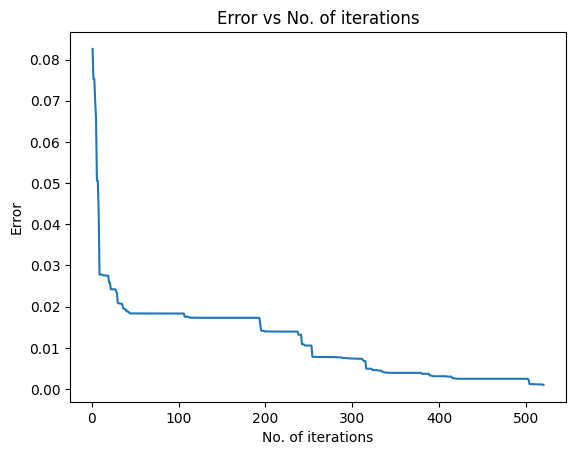

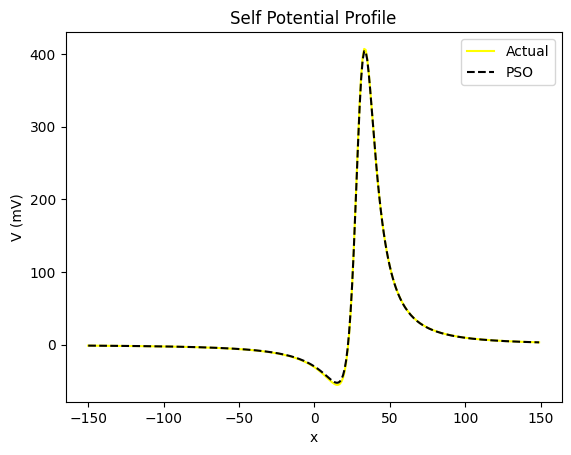

In [15]:
noOfRuns = 0
while (1):
    noOfIterations = np.array([])
    errorG = np.array([])
    noOfRuns = noOfRuns+1
    position = np.empty((3, 20))
    for k in range(0, 20):
        position[0, k] = -150 + np.random.random()*300
        position[1, k] = (5+np.random.random()*45)
        position[2, k] = (np.random.random()*90)
    l_best = position
    V = np.empty((300, 20))
    L = np.empty((300, 20))
    G = np.empty((300, 1))
    U = 2*position-1
    c = 0
    g = 500*np.ones((3, 1))

    # pso
    while (1):
        c = c+1
        # finding updating V
        for k in range(0, 20):
            for i in range(0, 300):
                V[i, k] = PotentialSphere(x[i], position[0, k],
                                    position[1, k], position[2, k])
                L[i, k] = PotentialSphere(x[i], l_best[0, k],
                                    l_best[1, k], l_best[2, k])
        for i in range(0, 300):
            G[i, 0] = PotentialSphere(x[i], g[0, 0], g[1, 0], g[2, 0])

        # updating l best
        for i in range(0, 20):
            if (Error(V)[i] <= Error(L)[i]):
                for k in range(0, 3):
                    l_best[k][i] = position[k][i]

        # finding g best
        if (np.min(Error(V)) <= Error(G)):
            for i in range(0, 3):
                g[i][0] = position[i][np.argmin(Error(V))]

        # updating parameters
        for j in range(0, 20):
            for i in range(0, 3):
                U[i][j] = 0.1*U[i][j] - 2*np.random.random()*(position[i][j] -
                                                              l_best[i][j]) - 2*np.random.random()*(position[i][j] - g[i][0])

        position = position + U

        # checking range
        for i in range(0, 20):
            if (position[0][i] < -150):
                position[0][i] = -150
            if (position[0][i] > 150):
                position[0][i] = 150
            if (position[1][i] < 5):
                position[1][i] = 5
            if (position[1][i] > 50):
                position[1][i] = 50
            if (position[2][i] < 0):
                position[2][i] = 0
            if (position[2][i] > 90):
                position[2][i] = 90
        noOfIterations = np.append(noOfIterations, c)
        errorG = np.append(errorG, Error(G))
        if (Error(G) < 0.001):
            break
        else:
            print(c, end='. ')
            print(
                f"Error = {float(Error(G))}\n\tx = {g[0][0]}, h = {position[1][0]}, theta = {position[2][0]}\n")
    if (c):
        break
# print('PSO was', rerun, 'times')
print('Total no. of iterations were', (noOfRuns-1)*400+c-1,end='\n')
print(
    f'Original parameters were\n\tx = {Xo}, h = {h}, theta = {theta}')
print(
    f'Final parameters are\n\tx = {g[0][0]}, h = {g[1][0]}, theta = {g[2][0]}')
print('Final Error is', float(Error(G)))

plt.plot(noOfIterations, errorG)
plt.xlabel('No. of iterations')
plt.ylabel('Error')
plt.title('Error vs No. of iterations')
plt.savefig('Error.png', dpi=300)
plt.show()

Vans = np.empty((300, 1))
for i in range(0, 300):
    Vans[i, 0] = (PotentialSphere(x[i], g[0][0], g[1][0], g[2][0]))
plt.plot(x, Vo*1000, label='Actual', color='yellow')
plt.plot(x, Vans*1000, label='PSO', color='black', linestyle='dashed')
plt.title('Self Potential Profile')
plt.xlabel('x')
plt.ylabel('V (mV)')
plt.legend()
plt.savefig('SP_Profile.png', dpi=300)
plt.show()
